In [42]:
#Importa os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('dark_background')
pd.set_option('float_format', '{:.2f}'.format)

#### Dicionário de Variáveis utilizadas
|Chave|Descrição|Função|
|-----|-----|-----|
|**Identificação**|
|Ano| Ano de referência|Controle|
|Trimestre| Trimestre de referência|Controle|
|UF| Estado|Controle|
|Capital| Capital da UF|Controle|
|UPA| Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))|Controle|
|V1008| Número do Domicílio|Controle|
|V1014| Painel - Grupo de Controle|Controle|
|V1016| Número de entrevista (1 a 5)|Controle|
|V2003| Número de ordem|Controle|
|**Características**|
|V2007| Sexo|Característica|
|V2008| Dia Nascimento|Característica|
|V20081| Mês nascimento|Característica|
|V20082| Ano nascimento|Característica|
|V2010| Raça|Característica|
|**Variáveis exploradas**|
| VD4001 | Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4002 | Condição de ocupação na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4003 | Força de trabalho potencial para pessoas de 14 anos ou mais de idade | Descrição |
| VD4004A | Subocupação por insuficiência de horas efetivamente trabalhadas em todos os trabalhos | Descrição |
| VD4005 | Pessoas desalentadas na semana de referência | Descrição |
|**Auxiliares**|
|V1028| Peso do domicílio e das pessoas sem calibração|Expansão|
|V1029| Peso do domicílio e das pessoas com calibração|Expansão|
|V1033| Projeção da população por sexo e idade|Expansão|
|posest|Domínios de projeção geográficos|Expansão|

 Chave para pessoa: UPA + V1008 + V1014  + V2003 + V2007 + V2008 + V20081 + V20082

 **PARA ESTIMAÇÃO DA POPULAÇÃO, DEVE-SE USAR AS VARIÁVEIS: V1033 e posest.**



#### Importação e tratamento dos microdados

Importação dos microdados

In [2]:
#determina qual diretório usar para cada sistema operacional.
import os
if os.name == 'nt': #windows
    diretorio = 'C:\\Users\\est.matheus.brasil\\Documents\\Microdados PNAD Contínua\\feather\\'

else: #linux(ou mac)
    diretorio = '/home/matheus/Microdados PNAD/feather/'


#Leitura de todas as bases com as variáveis selecionadas e criação de variáveis dinamicamente.

colunas_selecionadas = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle
                        'VD4001', 'VD4002', 'VD4003', 'VD4004A','VD4005', #Variáveis de interesse
                        'V1027', 'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #expansão

# colunas_selecionadas_sup = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle
#                         'VD4001', 'VD4002', 'VD4003', 'VD4004A','S01021', #Variáveis de interesse
#                         'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #identificação
                        

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            #if tri == 4:
                #print(ano, tri)
                #globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}_suplementar.feather', columns=colunas_selecionadas_sup)
            #else:
                print(ano, tri)
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if 2019 < ano < 2022:
            #if ano == 2021 & tri == 4:
                #print(ano, tri)
                #globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}_suplementar.feather', columns=colunas_selecionadas_sup)
            #else:
                print(ano, tri)
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if ano == 2022 and tri < 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)

2019 4
2020 1
2020 2
2020 3
2020 4
2021 1
2021 2
2021 3
2021 4
2022 1
2022 2


In [3]:
#Concatena todos os dataframes de cada ano e trimestre em uma unica tabela.

pnadc_completa = pd.concat([pnad_2019_4, 
                            pnad_2020_1, 
                            pnad_2020_2, 
                            pnad_2020_3, 
                            pnad_2020_4, 
                            pnad_2021_1, 
                            pnad_2021_2, 
                            pnad_2021_3, 
                            pnad_2021_4, 
                            pnad_2022_1, 
                            pnad_2022_2])

pnadc_completa['V2007'] = np.where(pnadc_completa['V2007'] == 'Homem', 0, 1)

In [4]:
pnadc_completa['UPA'] = pd.to_numeric(pnadc_completa['UPA'] , errors='coerce') 
pnadc_completa['V1008'] = pd.to_numeric(pnadc_completa['V1008'] , errors='coerce') 
pnadc_completa['V1014'] = pd.to_numeric(pnadc_completa['V1014'] , errors='coerce') 
pnadc_completa['V2007'] = pd.to_numeric(pnadc_completa['V2007'] , errors='coerce') 
pnadc_completa['V2008'] = pd.to_numeric(pnadc_completa['V2008'] , errors='coerce') 
pnadc_completa['V20081'] = pd.to_numeric(pnadc_completa['V20081'] , errors='coerce') 
pnadc_completa['V20082'] = pd.to_numeric(pnadc_completa['V20082'] , errors='coerce') 

In [5]:
pnadc_completa = pd.DataFrame({
    #Controle
    'Ano':pnadc_completa['Ano'], 
    'Trimestre':pnadc_completa['Trimestre'],
    'UPA':pnadc_completa['UPA'],
    'UF':pnadc_completa['UF'],
    'V2007':pnadc_completa['V2007'],
    #ID  
    'ID': pnadc_completa['UPA'] + 
        pnadc_completa['V1008'] + 
        pnadc_completa['V1014'] + 
        pnadc_completa['V2007'] +
        pnadc_completa['V2008'] +
        pnadc_completa['V20081'] +
        pnadc_completa['V20082'],
    #Exploradas
    'V2010': pnadc_completa['V2010'],
    'VD4001': pnadc_completa['VD4001'],
    'VD4002': pnadc_completa['VD4002'],
    'VD4003': pnadc_completa['VD4003'],
    'VD4004A': pnadc_completa['VD4004A'],
    'VD4005': pnadc_completa['VD4005'],
    #Expansão
    'V1027': pnadc_completa['V1027'],
    'V1028': pnadc_completa['V1028'],
    'V1029': pnadc_completa['V1029'],
    'V1033': pnadc_completa['V1033'],
    'posest': pnadc_completa['posest'],
    'posest_sxi': pnadc_completa['posest_sxi']
    })

#Reverte alteração da coluna V2007 para os rótulos anteiores
pnadc_completa['V2007'] = pnadc_completa['V2007'].apply(lambda x: 'Homem' if x == 0 else 'Mulher')

In [6]:
# Ordernação da série histórica por ano e trimestre.
pnadc_completa.sort_values(by=['Ano', 'Trimestre'], inplace=True)
#concatena a coluna 'Ano' e 'Trimestre' em uma única coluna.
pnadc_completa['ano_tri'] = pnadc_completa['Ano'].astype(str) + 'Q' + pnadc_completa['Trimestre'].astype(str)
#Conversão da coluna ano_tri para datetime.
pnadc_completa['ano_tri'] = pd.to_datetime(pnadc_completa['ano_tri']).dt.to_period('Q')

In [7]:
pnadc_completa.head()

,Ano,Trimestre,UPA,UF,V2007,ID,V2010,VD4001,VD4002,VD4003,VD4004A,VD4005,V1027,V1028,V1029,V1033,posest,posest_sxi,ano_tri
0,2019,4,110000016,Rondônia,Mulher,110002003,Parda,Pessoas na força de trabalho,Pessoas ocupadas,None,Pessoas subocupadas,None,98.756636,145.628790,532471,6982307,111,210,2019Q4
1,2019,4,110000016,Rondônia,Mulher,110002034,Parda,Pessoas fora da força de trabalho,None,Pessoas fora da força de trabalho e fora da fo...,None,None,98.756636,145.628790,532471,8485527,111,206,2019Q4
2,2019,4,110000016,Rondônia,Mulher,110002051,Parda,Pessoas fora da força de trabalho,None,Pessoas fora da força de trabalho e fora da fo...,None,None,98.756636,145.628790,532471,9316281,111,204,2019Q4
3,2019,4,110000016,Rondônia,Homem,110002077,Parda,None,None,None,None,None,98.756636,145.628790,532471,7432741,111,102,2019Q4
4,2019,4,110000016,Rondônia,Homem,110002012,Parda,Pessoas fora da força de trabalho,None,Pessoas fora da força de trabalho e na força d...,None,None,98.756636,134.017538,532471,5214819,111,112,2019Q4


In [21]:
forca_trab_expandida = (pnadc_completa.groupby(['ano_tri','VD4001'])['V1028'].sum() * \
    pnadc_completa.groupby(['ano_tri','VD4001'])['V1033'].sum() / \
    pnadc_completa.groupby(['ano_tri','VD4001'])['V1033'].sum())

In [34]:
df = pd.crosstab(pnadc_completa['ano_tri'], pnadc_completa['VD4001'], values=pnadc_completa['V1028'], aggfunc='sum')

In [12]:
forca_trab_expandida.groupby('ano_tri').sum().plot(kind='bar', stacked=True, figsize=(15, 5), title='Força de Trabalho Expandida')
plt.show()

KeyError: 'ano_tri'

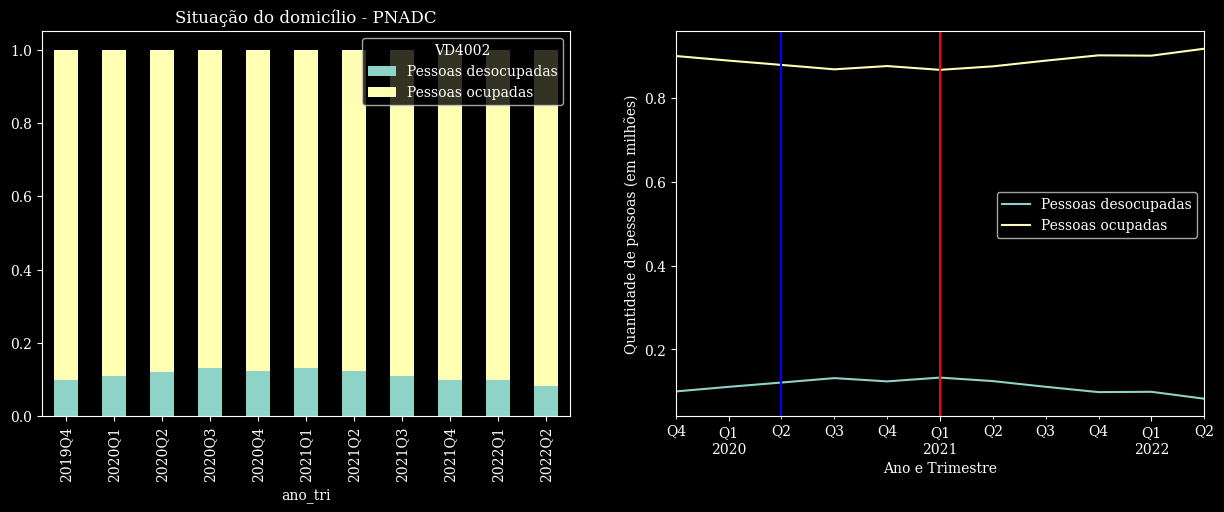

In [ ]:
situacao_expandida = pd.crosstab(index=pnadc_completa['ano_tri'],
                            columns=pnadc_completa['VD4002'], 
                            values=(pnadc_completa['V1029']*pnadc_completa['posest'])/pnadc_completa['V1029'], 
                            aggfunc='sum',
                            normalize='index')                            

fig, ax = plt.subplots(1, 2, figsize=(15,5))

situacao_expandida.plot(ax=ax[0], kind='bar', stacked=True, title='Situação do domicílio - PNADC')

situacao_expandida.plot(ax=ax[1])

plt.legend(bbox_to_anchor=(1, 0.6), loc='upper right', prop={'size': 10})
plt.axvline(x = '2020Q2', color = 'b', label = 'Início do Lockdown no Brasil')
plt.axvline(x = '2021Q1', color = 'r', label = 'Início da vacinação no Brasil')
plt.xlabel('Ano e Trimestre')
plt.ylabel('Quantidade de pessoas (em milhões)')

plt.show()

Fluxo de desemprego

In [ ]:
fluxo1 = pnadc_completa[(pnadc_completa['ano_tri']=='2019Q4')&(pnadc_completa['VD4001']=='Pessoas na força de trabalho')][['ID','VD4002']]
fluxo2 = pnadc_completa[(pnadc_completa['ano_tri']=='2020Q1')&(pnadc_completa['VD4001']=='Pessoas na força de trabalho')][['ID','VD4002']]
fluxos = pd.merge(fluxo1, fluxo2, on='ID', how='inner')
fluxos.columns = ['ID', 'VD4002 2019', 'VD4002 2020']

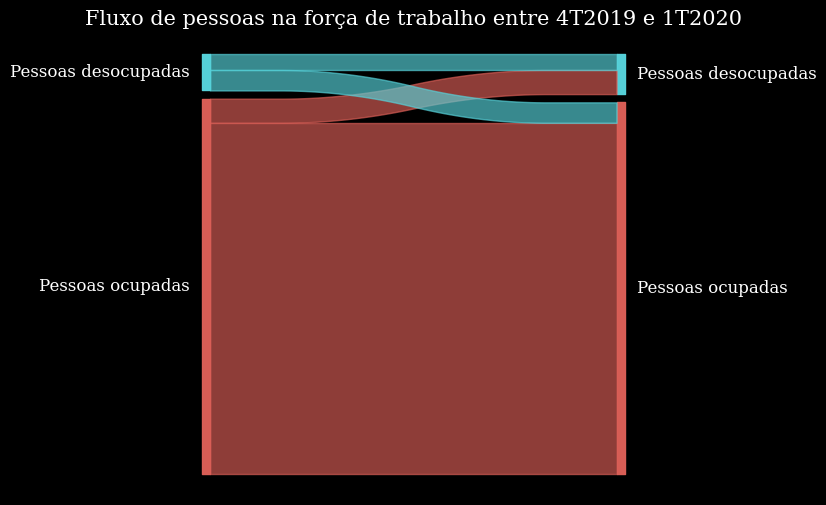

In [ ]:
from pySankey.sankey import sankey


sankey(fluxos["VD4002 2019"], fluxos["VD4002 2020"], aspect=20, fontsize=12, )
plt.title('Fluxo de pessoas na força de trabalho entre 4T2019 e 1T2020', fontsize=15)
plt.show()

In [ ]:
pnadc_completa.groupby(['VD4001'])['VD4001'].count()

VD4001
Pessoas fora da força de trabalho    1661351
Pessoas na força de trabalho         2135557
Name: VD4001, dtype: int64

In [ ]:
pnadc_completa.groupby(['VD4002'])['VD4002'].count()

VD4002
Pessoas desocupadas     246509
Pessoas ocupadas       1889048
Name: VD4002, dtype: int64

In [ ]:
pnadc_completa.groupby(['VD4003'])['VD4003'].count()

VD4003
Pessoas fora da força de trabalho e fora da força de trabalho potencial    1409141
Pessoas fora da força de trabalho e na força de trabalho potencial          252210
Name: VD4003, dtype: int64

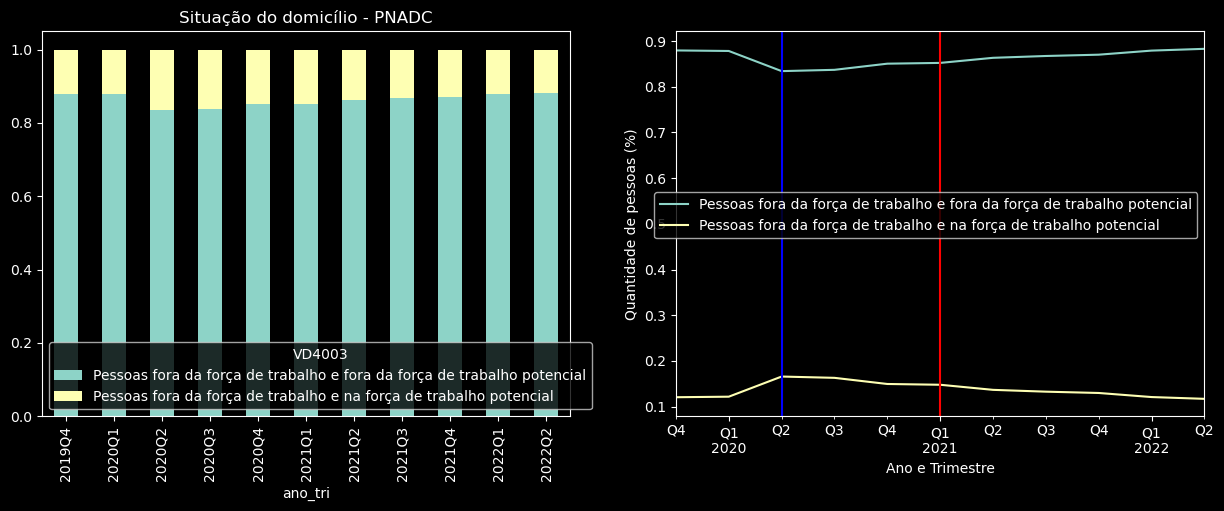

In [37]:
forca_potencial_expandida = pd.crosstab(index=pnadc_completa['ano_tri'],
                            columns=pnadc_completa['VD4003'], 
                            values=(pnadc_completa['V1029']*pnadc_completa['posest'])/pnadc_completa['V1029'], 
                            aggfunc='sum',
                            normalize='index')                            

fig, ax = plt.subplots(1, 2, figsize=(15,5))

forca_potencial_expandida.plot(ax=ax[0], kind='bar', stacked=True, title='Situação do domicílio - PNADC')

forca_potencial_expandida.plot(ax=ax[1])

plt.legend(bbox_to_anchor=(1, 0.6), loc='upper right', prop={'size': 10})
plt.axvline(x = '2020Q2', color = 'b', label = 'Início do Lockdown no Brasil')
plt.axvline(x = '2021Q1', color = 'r', label = 'Início da vacinação no Brasil')
plt.xlabel('Ano e Trimestre')
plt.ylabel('Quantidade de pessoas (%)')

plt.show()
